In [18]:
from dataclasses import dataclass
import csv

import click
import requests
import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio
import ipympl 

import random 
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
from collections import deque

In [19]:
import os 
print(os.getcwd())

d:\source\PesquisaMestradoFinal


Foram geradas as ações abaixo  
acao 0 = ["0.1,0.1,0.1,1,1","1,1,1,0.1,0.1","0.5,0.5,0.5,0.1,0.1","0.1,0.1,0.1,0.5,0.5","1,1,1,1,1"] 
Com as ações acima, foram criado cenários com 68 interação no ambiente
Ambiente é uma topologia de rede neural para resoluções de questões do tipo  multitarefas da base Clevr sem imagem  
Cada epsódio foi executado 3x e sua média computada 
Para cada média dos epsodios foram gerados :
     Grafico   
     DataBase para execução DQN 



In [20]:
#Carrega a media dos epsodios 
def LoadEp( acao ): 
    
    arquivo = pd.read_csv(acao)
    return arquivo
    

In [21]:
#Gera Database Para treinamento DQN 

def generateDataBaseEpsodi ( dataEpsopdios,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory):
  state = [0,0,0,0,0]
  acumulativeReward = 0
  done = False
  print(episodes*intFactor)
  
  for epsodio in dataEpsopdios:
    for interaction in range(episodes*intFactor): 
   
      action = epsodio["acao"][interaction]  
      print('****************************************************** aqui ***********************')
      print(ast.literal_eval(epsodio["concat"][interaction])*power)
      stateNew = ast.literal_eval(epsodio["concat"][interaction])*power     
      if TypeReward == "MAX" :
        reward = multi*np.max(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "MIN" :
        reward = multi*np.min(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "MAX_LAST" :
        reward = multi*np.max(stateNew )
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      elif TypeReward == "MIN_LAST" :
        reward = multi*np.min(stateNew)
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      elif TypeReward == 'AVERAGE_LAST':
        reward = multi*np.average(stateNew) 
        if interaction == DoneInteractions-1:
          acumulativeReward = np.average(stateNew)
      
      else: 
        print('ERRO ERRO ERRO ERRO ERRO')
      if interaction >= DoneInteractions*intFactor -1  :
        done = True
      memory.append([state,action,reward,stateNew,done])
      state = stateNew
      print(" ************  Random: Episode {}, Reward {}".format(
                interaction, acumulativeReward))

  return memory

In [22]:
def generateDataToRels ( epsodios, questoes ):
 
    graf =  np.zeros ((len(epsodios),questoes,len(epsodios[0]["concat"])))

    for ep in range ( len(epsodios)):
        #print(ep)
        for questao  in range(questoes):
            for interaction in range(len(epsodios[0]["concat"])):
                graf[ep,questao,interaction] = ast.literal_eval(epsodios[ep]["concat"][interaction])[questao]
    return graf        



In [23]:
def gerarRelatorio( baseDados):
   
  acoes=  ['0.1,0.1,0.1,1,1','0.5,0.5,0.5,1,1','1,1,1,1,1','1,1,1,0.5,0.5','1,1,1,0.1,0.1'] 
  
  for i in range(len(baseDados)):
    fig, ax = plt.subplots()
    for acao in range ( len( baseDados[i] )  ): 
      ax.plot(baseDados[i,acao],label="Questao {}".format(i))
     
    ax.set_title('ação - {}'.format(acoes[i]) )
    plt.legend(loc="lower right")
    fig.autofmt_xdate()  
      
  

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)


In [24]:


# Problem
DoneInteractions = 28


# Database
episodes = 28
intFactor = 1
buffer_size = episodes*DoneInteractions*intFactor

TypeReward = "MIN"
multi = 1
power = 1

memory = deque(maxlen=buffer_size)
epsodios =[]

ac1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao0.csv')
ac2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao1.csv')
ac3 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao2.csv')
ac4 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao3.csv')
ac5 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao4.csv')


epsodios.append(ac1)
epsodios.append(ac2)
epsodios.append(ac3)
epsodios.append(ac4)
epsodios.append(ac5)

memory1 = generateDataBaseEpsodi ( epsodios,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory)
print('****************' + str(len(epsodios)))



28
****************************************************** aqui ***********************
[0.05522, 0.07476, 0.07682, 0.12434, 0.12073]
 ************  Random: Episode 0, Reward 0.05522
****************************************************** aqui ***********************
[0.4864, 0.53989, 0.55737, 0.19511, 0.20278]
 ************  Random: Episode 1, Reward 0.25033
****************************************************** aqui ***********************
[0.49427, 0.56774, 0.59462, 0.32298, 0.31463]
 ************  Random: Episode 2, Reward 0.56496
****************************************************** aqui ***********************
[0.49429, 0.58679, 0.59309, 0.34019, 0.33513]
 ************  Random: Episode 3, Reward 0.9000900000000001
****************************************************** aqui ***********************
[0.48437, 0.58681, 0.59497, 0.34305, 0.35161]
 ************  Random: Episode 4, Reward 1.2431400000000001
****************************************************** aqui *********************

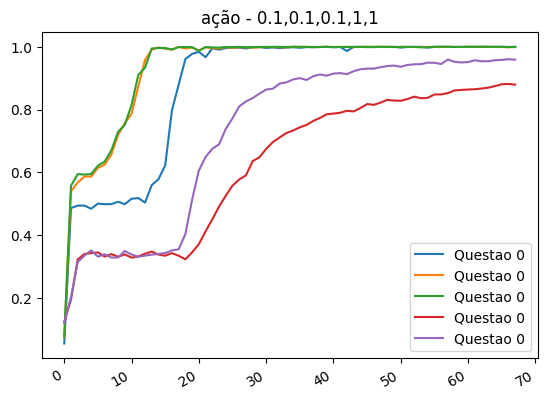

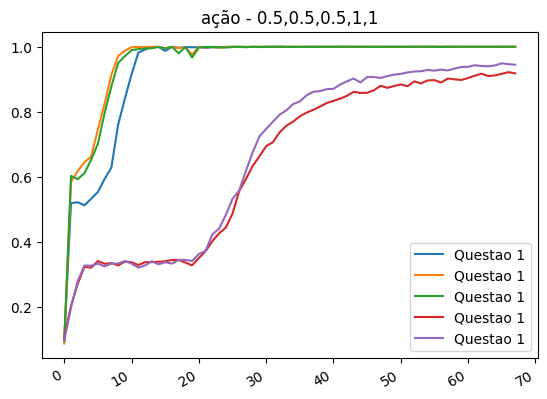

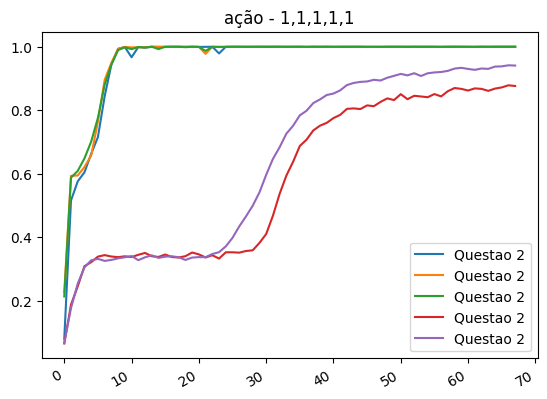

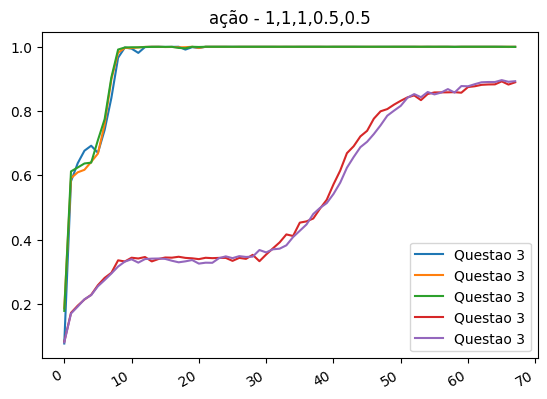

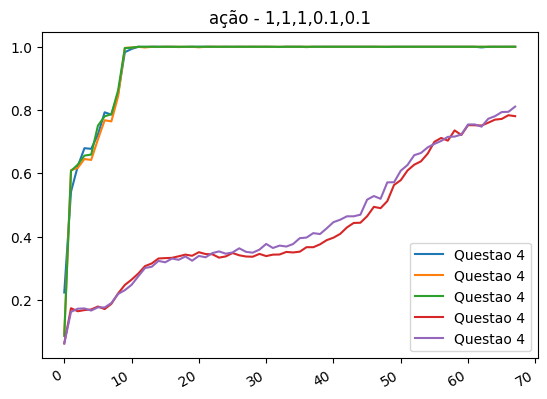

In [25]:
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel)

In [26]:
def plotDataAnalise (Qpoliticas, criterion,qtdAnalise) :


  V = []
  contador=-1
   
  for Q_ in Qpoliticas: 
    Q_ = Q_[:qtdAnalise] 
    contador+=1
    if criterion == 'MIN':
      plt.plot(np.min(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.sum(np.min(Q_,axis=1) ) )
    elif criterion == 'MAX':
      plt.plot(np.max(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.sum(np.max(Q_,axis=1) ) )
    elif criterion == 'MIN_LAST':
      plt.plot(np.min(Q_,axis=1),label='P,olitica :{}'.format(contador))
      V.append( np.min(Q_[-1]) )
    elif criterion == 'MAX_LAST':
      plt.plot(np.max(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.max(Q_[-1]) )
    elif criterion == 'AVERAGE_LAST':
      plt.plot(np.average(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.average(Q_[-1]) )

    else:
      print('BUG BUG BUG')

    plt.legend(loc="upper left")
  plt.show()
  return V




In [27]:
Q_ = epsodiosEvaluation[0]
print(np.sum(np.min(Q_[:35],axis=1) )) 
print(np.sum(np.min(Q_,axis=1) )) 



NameError: name 'epsodiosEvaluation' is not defined

In [ ]:
def GenerateDataToGraficAnalise(epsodios): 
    cont = -1 
    epsodiosEvaluation = []
    #print(len(epsodios))
    for e in range(len(epsodios)):
        ep=[] 
        for i in range(len(epsodios[e])) :
            ep.append(ast.literal_eval(epsodios[e]["concat"][i]  ))
        epsodiosEvaluation.append(ep)
    return epsodiosEvaluation

In [ ]:
#np.min([epsodiosEvaluation[1][:35]],axis=1)
#np.min(epsodiosEvaluation,axis=1)
#np.min(epsodiosEvaluation,axis=1)
#[[0.99866, 0.99983, 1.0, 0.73351, 0.89592]]

print(np.max(epsodiosEvaluation[0][-1]))
print(np.max(epsodiosEvaluation[0][:35][-1]))

len(epsodiosEvaluation[0])

1.0
1.0


68

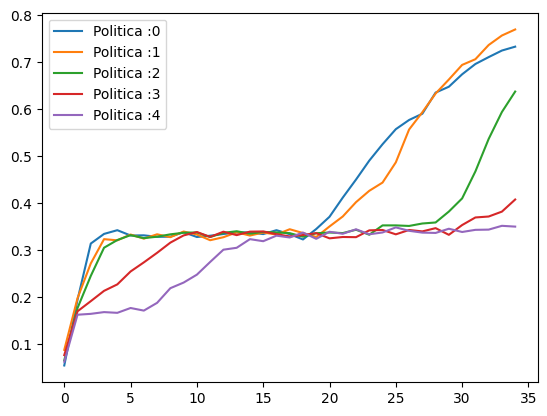

Minimo -[15.06033, 14.801649999999999, 12.29673, 10.96402, 9.948049999999999]


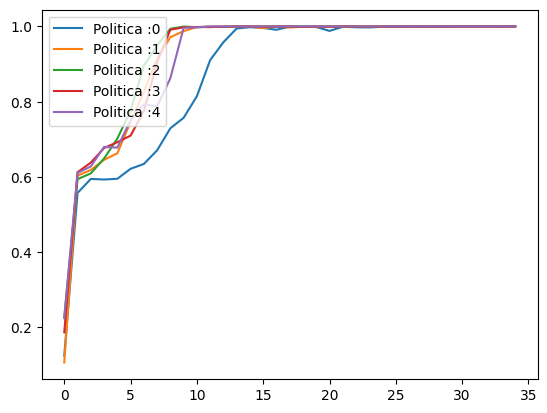

Maximo -[30.51442, 32.065020000000004, 32.3921, 32.17929, 32.0084]


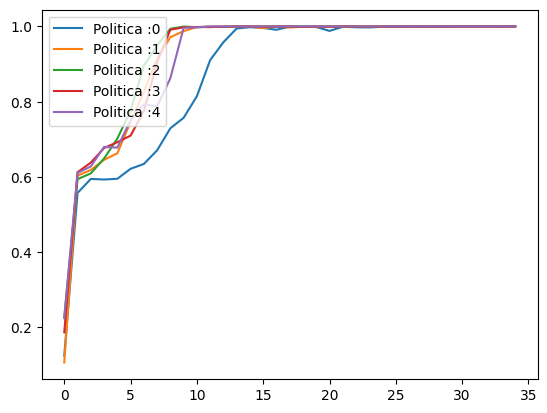

Maximo LAST -[1.0, 1.0, 1.0, 1.0, 1.0]


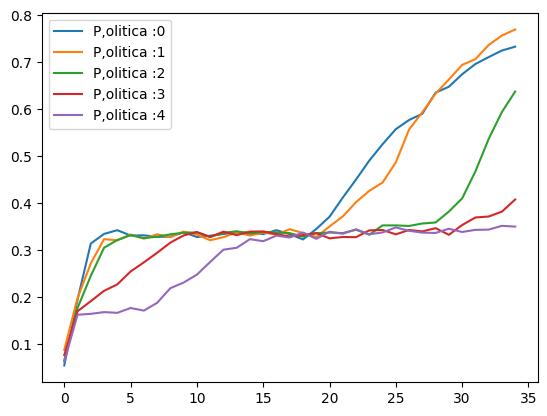

Minimo LAST -[0.73351, 0.77008, 0.638, 0.40832, 0.35068]


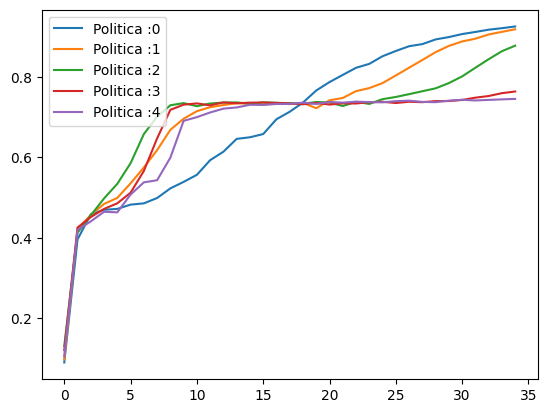

Avarage LAST -[0.925584, 0.918662, 0.87787, 0.7639520000000001, 0.745592]


[1.0, 1.0, 1.0, 0.78087, 0.81123]

In [ ]:

epsodiosEvaluation = GenerateDataToGraficAnalise(epsodios)


#np.min(dataRel,axis=1)
min_data = plotDataAnalise (epsodiosEvaluation, 'MIN',35)
print("Minimo -{}".format(min_data))

max_data = plotDataAnalise (epsodiosEvaluation, 'MAX',35)
print("Maximo -{}".format(max_data))

max_last_data = plotDataAnalise (epsodiosEvaluation, 'MAX_LAST',35)
print("Maximo LAST -{}".format(max_last_data))

min_last_data = plotDataAnalise (epsodiosEvaluation, 'MIN_LAST',35)
print("Minimo LAST -{}".format(min_last_data))

avarage_last_data = plotDataAnalise (epsodiosEvaluation, 'AVERAGE_LAST',35)
print("Avarage LAST -{}".format(avarage_last_data))

#dataRel[0]
epsodiosEvaluation[4][67]


In [ ]:

cont = -1 
epsodiosEvaluation = []
#print(len(epsodios))
for e in range(len(epsodios)):
   ep=[] 
   for i in range(len(epsodios[e])) :
      ep.append(ast.literal_eval(epsodios[e]["concat"][i]  ))
   epsodiosEvaluation.append(ep)

#epsodiosEvaluation[0]
epsodiosEvaluation[4][-1:]
#ast.literal_eval(epsoios[0]["concat"][0])
#np.min(epsodios[0]["concat"],axis=epsodiosEvaluation1)
#      V.append( np.sum(np.min(Q_,axis=1) ) )
#arrayData = np.zeros(5,len(dataRel[0][1])  )


#ast.literal_eval(epsodios[ep]["concat"][interaction])[acao]
#graf[ep,questao,interaction]
#for i in range(len(dataRel[0][1])):

#dataRel[0]

#print(dataRel[0])
#print(np.min(dataRel[0],axis=0))

NameError: name 'epsodios' is not defined

In [ ]:

np.min(dataRel[-1,:]) 

0.06325